In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\假设检验\data_mai_huan.csv')
data_pred = pd.read_csv(r'C:\Users\DELL\Desktop\假设检验\graph_data_and_predictions_mai_huan.csv')

In [5]:
data_total = pd.concat([data,data_pred[['Train Mask','Val Mask','Test Mask','Model Predictions']]],axis=1)
data_total_train = data_total[data_total['Train Mask']]
data_total_val = data_total[data_total['Val Mask']]
data_total_test = data_total[data_total['Test Mask']]

In [7]:
def getTP(row):
    label = row['Label']
    pred = row['Model Predictions']
    if label == 1 and pred == 1:
        return True
    else:
        return False

def getFP(row):
    label = row['Label']
    pred = row['Model Predictions']
    if label == 0 and pred == 1:
        return True
    else:
        return False

data_total_test_TP = data_total_test[data_total_test.apply(getTP, axis=1)]
data_total_test_FP = data_total_test[data_total_test.apply(getFP, axis=1)]

   'XB': '性别',二项分布检验
   
   'FWMJ': '房屋面积', ①配对样本Wilcoxon检验
   
   'FWMJ.1': '房屋面积.1', ①配对样本Wilcoxon检验
   
   'CZMJ': '出租面积', Mann-Whitney-U检验
   
   'YZJ': '月租金', F检验  
   
   'FWZJ': '房屋总价',Mann-Whitney-U检验
   
   'SFAJ': '是否按揭',二项分布检验
   
   "RentType": "出租类型",二项分布检验
   
   'Age': '年龄',②配对样本Wilcoxon检验
   
   "BuyerAge": "租房时年龄",②配对样本Wilcoxon检验
   
   "MonthlyRentUnitArea":"单位面积月租金"，F检验
   
   "In_Province":"原四川省居民",二项分布检验
   
   "In_City":"原成都市居民",二项分布检验

In [8]:
feature_dict = {
    'XB': '性别',
    "RentType": "出租类型",
    "In_Province":"原四川省居民",
    "In_City":"原成都市居民",
    "SFAJ":"是否按揭"
}

def test(feature):
    feature_name = feature_dict[feature]
    sns.kdeplot(data=data_total_test_TP[feature], label='True Positive', color='blue', alpha=0.5)
    sns.kdeplot(data=data_total_test_FP[feature], label='False Positive', color='orange', alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()
    
    p_value = stats.binom_test(sum(data_total_test_TP[feature]), n=len(data_total_test_TP[feature]), p=sum(data_total_test_FP[feature]) / len(data_total_test_FP[feature]))
    print("二项分布检验（{}）：".format(feature_name))
    print("p-value =", p_value)


In [ ]:
for i in ['XB', 'RentType',"In_Province","In_City",'SFAJ']:
    print("#"*30)
    test(i)

In [6]:
feature_dict = {
    'CZMJ': '出租面积'
}

def test(feature):
    feature_name = feature_dict[feature]
    sns.kdeplot(data=data_total_test_TP[feature], label='True Positive', color='blue', alpha=0.5)
    sns.kdeplot(data=data_total_test_FP[feature], label='False Positive', color='orange', alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()

    t_stat, p_value = stats.mannwhitneyu(data_total_test_TP[feature], data_total_test_FP[feature])
    print("Mann-Whitney-U检验（{}）：".format(feature_name))
    print("Statistic =", t_stat)
    print("p-value =", p_value)

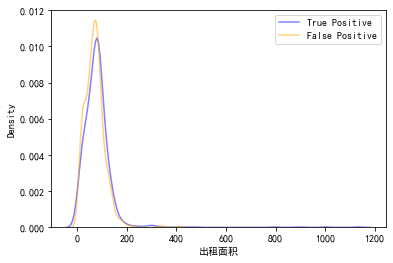

Mann-Whitney-U检验（出租面积）：
Statistic = 428609.5
p-value = 0.00013766913729603537


In [7]:
test('CZMJ')

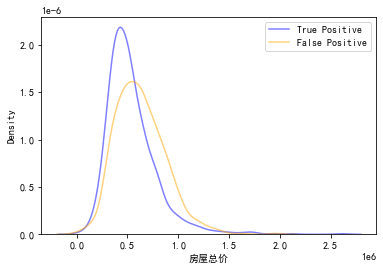

ranksums检验（房屋总价）：
Statistic = 291529.5
p-value = 8.63274163780354e-19


In [9]:
sns.kdeplot(data=data_total_test_TP['FWZJ'], label='True Positive', color='blue', alpha=0.5)
sns.kdeplot(data=data_total_test_FP['FWZJ'], label='False Positive', color='orange', alpha=0.5)
feature_name='房屋总价'
plt.xlabel(feature_name)
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

t_stat, p_value = stats.mannwhitneyu(data_total_test_TP['FWZJ'], data_total_test_FP['FWZJ'])
print("ranksums检验（{}）：".format(feature_name))
print("Statistic =", t_stat)
print("p-value =", p_value)

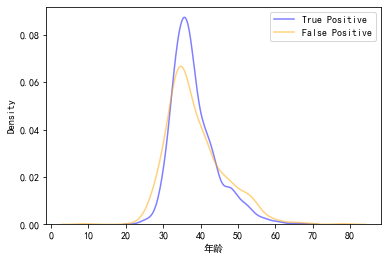

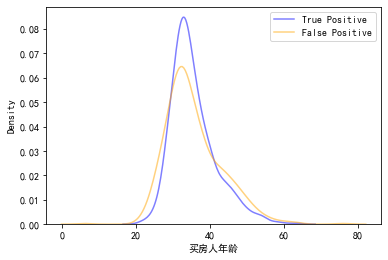

TPR 配对Wilcoxon统计值和P-value:
统计值: 0.0
P-value: 3.243571418073696e-188

FPR 配对Wilcoxon统计值和P-value:
统计值: 0.0
P-value: 7.729989404118636e-116


In [134]:
feature_dict = {
    'Age': '年龄',
    "BuyerAge": "买房人年龄",
}

sns.kdeplot(data=data_total_test_TP['Age'], label='True Positive', color='blue', alpha=0.5)
sns.kdeplot(data=data_total_test_FP['Age'], label='False Positive', color='orange', alpha=0.5)
plt.xlabel('年龄')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

sns.kdeplot(data=data_total_test_TP['BuyerAge'], label='True Positive', color='blue', alpha=0.5)
sns.kdeplot(data=data_total_test_FP['BuyerAge'], label='False Positive', color='orange', alpha=0.5)
plt.xlabel('买房人年龄')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

# 假设你有一对TPR数据集和一对FPR数据集
TPR_pair = list(zip(data_total_test_TP['BuyerAge'],data_total_test_TP['Age']))
FPR_pair = list(zip(data_total_test_FP['BuyerAge'],data_total_test_FP['Age']))

# 使用配对Wilcoxon检验
statistic_TPR, p_value_TPR = stats.wilcoxon([pair[0] for pair in TPR_pair], [pair[1] for pair in TPR_pair])
statistic_FPR, p_value_FPR = stats.wilcoxon([pair[0] for pair in FPR_pair], [pair[1] for pair in FPR_pair])

print("TPR 配对Wilcoxon统计值和P-value:")
print("统计值:", statistic_TPR)
print("P-value:", p_value_TPR)

print("\nFPR 配对Wilcoxon统计值和P-value:")
print("统计值:", statistic_FPR)
print("P-value:", p_value_FPR)

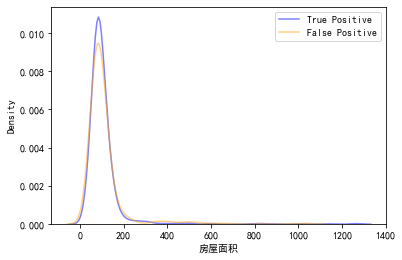

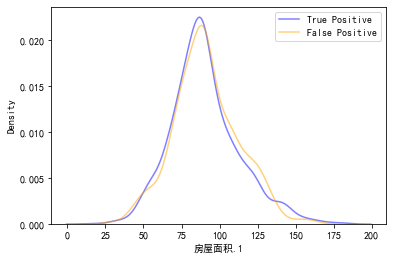

TPR 配对Wilcoxon统计值和P-value:
统计值: 272452.5
P-value: 0.011178976549154666

FPR 配对Wilcoxon统计值和P-value:
统计值: 105797.0
P-value: 0.21060180777616933


In [135]:
feature_dict = {
    'FWMJ': '房屋面积',
    "FWMJ.1": "房屋面积.1",
}

sns.kdeplot(data=data_total_test_TP['FWMJ'], label='True Positive', color='blue', alpha=0.5)
sns.kdeplot(data=data_total_test_FP['FWMJ'], label='False Positive', color='orange', alpha=0.5)
plt.xlabel('房屋面积')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

sns.kdeplot(data=data_total_test_TP['FWMJ.1'], label='True Positive', color='blue', alpha=0.5)
sns.kdeplot(data=data_total_test_FP['FWMJ.1'], label='False Positive', color='orange', alpha=0.5)
plt.xlabel('房屋面积.1')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

# 假设你有一对TPR数据集和一对FPR数据集
TPR_pair = list(zip(data_total_test_TP['FWMJ'],data_total_test_TP['FWMJ.1']))
FPR_pair = list(zip(data_total_test_FP['FWMJ'],data_total_test_FP['FWMJ.1']))

# 使用配对Wilcoxon检验
statistic_TPR, p_value_TPR = stats.wilcoxon([pair[0] for pair in TPR_pair], [pair[1] for pair in TPR_pair])
statistic_FPR, p_value_FPR = stats.wilcoxon([pair[0] for pair in FPR_pair], [pair[1] for pair in FPR_pair])

print("TPR 配对Wilcoxon统计值和P-value:")
print("统计值:", statistic_TPR)
print("P-value:", p_value_TPR)

print("\nFPR 配对Wilcoxon统计值和P-value:")
print("统计值:", statistic_FPR)
print("P-value:", p_value_FPR)

In [159]:
feature_dict = {
    'YZJ': '月租金',
    "MonthlyRentUnitArea":"单位面积月租金"
}

def test(feature):
    feature_name = feature_dict[feature]
    sns.kdeplot(data=data_total_test_TP[feature], label='True Positive', color='blue', alpha=0.5)
    sns.kdeplot(data=data_total_test_FP[feature], label='False Positive', color='orange', alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()

    t_stat, p_value = stats.f_oneway(data_total_test_TP[feature], data_total_test_FP[feature])
    print("F检验（{}）：".format(feature_name))
    print("Statistic =", t_stat)
    print("p-value =", p_value)

####################


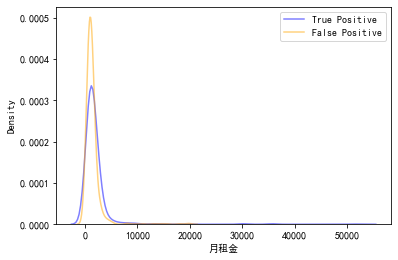

F检验（月租金）：
Statistic = 11.803045721377076
p-value = 0.0006046762476641899
####################


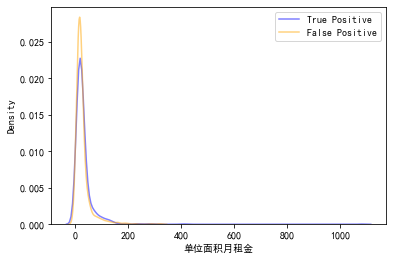

F检验（单位面积月租金）：
Statistic = 4.176126173502422
p-value = 0.04114165837069413


In [160]:
for i in ['YZJ', 'MonthlyRentUnitArea']:
    print("#"*20)
    test(i)